# Indoor Scene Recognition

- **Credit**: fastai & its notebook [01_intro.ipynb](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb)
- **Dataset**: [Indoor Scene Recognition](http://web.mit.edu/torralba/www/indoor.html) (link from [20 Free Image Datasets for Computer Vision](https://lionbridge.ai/datasets/20-best-image-datasets-for-computer-vision/))
- **Author**: [Pierre GUILLOU](https://www.linkedin.com/in/pierreguillou/)
- **Date**: 22/03/2021
- **Update**: 23/03/2021

In [2]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *

## Original code from fastai notebook 01_intro.ipynb

In [ ]:
# CLICK ME
# from fastai.vision.all import *
# path = untar_data(URLs.PETS)/'images'

# def is_cat(x): return x[0].isupper()
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#    label_func=is_cat, item_tfms=Resize(224))

# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(1)

## Use of the fastai code with another dataset

### 1. Import fastai vision library

In [ ]:
from fastai.vision.all import *

### 2. Get path to images

#### Example 1 | Link to download a tar file

- images in tar file (2.4 GB) : http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
- [TrainImages.txt](http://web.mit.edu/torralba/www/TrainImages.txt): contains the file names of each training image. Total 67*80 images
- [TestImages.txt](http://web.mit.edu/torralba/www/TestImages.txt): contains the file names of each test image. Total 67*20 images

In [4]:
!mkdir MyImages
%cd MyImages

mkdir: cannot create directory ‘MyImages’: File exists
/mnt/home/pierre/fastbook/clean/MyImages


**Get train and valid text files (subsets with url)**

In [7]:
# We are storing url of dataset
url = 'http://web.mit.edu/torralba/www/TrainImages.txt'
# We are creating a requests variable with the above url
r = requests.get(url, allow_redirects=True)
# We are writing the content of above request to 'iris.data' file
open('TrainImages.txt', 'wb').write(r.content)

# We are storing url of dataset
url = 'http://web.mit.edu/torralba/www/TestImages.txt'
# We are creating a requests variable with the above url
r = requests.get(url, allow_redirects=True)
# We are writing the content of above request to 'iris.data' file
open('TestImages.txt', 'wb').write(r.content)

43475

In [115]:
!mkdir urls_subsets
!mv 'TrainImages.txt' ./urls_subsets/
!mv 'TestImages.txt' ./urls_subsets/

In [130]:
train_file = path_imgs.parent/'urls_subsets/TrainImages.txt'
valid_file = path_imgs.parent/'urls_subsets/TestImages.txt'

**Get images tar file**

In [5]:
import requests # This library is used to make requests to internet

# We are storing url of dataset
url = 'http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar'
# We are creating a requests variable with the above url
r = requests.get(url, allow_redirects=True)
# We are writing the content of above request to 'iris.data' file
open('indoorCVPR_09.tar', 'wb').write(r.content)

2592010240

In [6]:
!tar -xvf indoorCVPR_09.tar

Images/
Images/airport_inside/
Images/airport_inside/airport_inside_0001.jpg
Images/airport_inside/airport_inside_0002.jpg
Images/airport_inside/airport_inside_0003.jpg
Images/airport_inside/airport_inside_0004.jpg
Images/airport_inside/airport_inside_0005.jpg
Images/airport_inside/airport_inside_0006.jpg
Images/airport_inside/airport_inside_0048.jpg
Images/airport_inside/airport_inside_0007.jpg
Images/airport_inside/airport_inside_0008.jpg
Images/airport_inside/airport_inside_0009.jpg
Images/airport_inside/airport_inside_0010.jpg
Images/airport_inside/airport_inside_0011.jpg
Images/airport_inside/airport_inside_0012.jpg
Images/airport_inside/airport_inside_0013.jpg
Images/airport_inside/airport_inside_0047.jpg
Images/airport_inside/airport_inside_0014.jpg
Images/airport_inside/airport_inside_0015.jpg
Images/airport_inside/airport_inside_0049.jpg
Images/airport_inside/airport_inside_0016.jpg
Images/airport_inside/airport_inside_0017.jpg
Images/airport_inside/airport_inside_0018.jpg
Ima

In [122]:
!ls

4drtyfjtfy-1.zip  dataset2	indoorCVPR_09.tar  weatherBing
Images		  dataset2.zip	urls_subsets


In [9]:
%cd ../..

/mnt/home/pierre/fastbook


In [4]:
# %cd ..

/mnt/home/pierre/fastbook


In [5]:
from pathlib import Path
path = Path.cwd()/'clean'
path_imgs = path/'MyImages/Images'
path_imgs

Path('/mnt/home/pierre/fastbook/clean/MyImages/Images')

In [282]:
path_imgs

Path('/mnt/home/pierre/fastbook/clean/MyImages/Images')

In [283]:
path_imgs.ls()

(#67) [Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/museum'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/mall'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/hospitalroom'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/greenhouse'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/bathroom'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/church_inside'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/kitchen'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/winecellar'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/videostore'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/corridor')...]

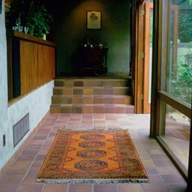

In [286]:
img = PILImage.create(path_imgs.ls()[9].ls()[0])
img.to_thumb(192)

#### Example 2 | Package bing_image_downloader

In [2]:
# !pip install bing_image_downloader
from bing_image_downloader import downloader

In [4]:
query_string = ["rain","cloudy","sunrise","shine"]
for qs in query_string:
    downloader.download(qs, limit=100,  output_dir='MyImages/weatherBing', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 101 Images on Page 1.


[%] Downloading Image #1 from https://greekherald.com.au/wp-content/uploads/2020/01/blog-rain-or-shine.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://patch.com/img/cdn20/users/22729282/20200928/072619/styles/patch_image/public/rain-and-shutter___28072559502.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://moneymarketing.co.za/wp-content/uploads/2019/12/Heavy-rain-1024x458.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.rcinet.ca/eye-on-the-arctic/wp-content/uploads/sites/30/2017/08/rain-expected-in-lapland-as-sun-shines-over-finland-2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/rain-falling-on-ground-david-de-lossy.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://dreamicus.com/data/rain/rain-03.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://cdn.motor1.com/ima

#### Example 3 | kaggle

- source: https://github.com/Kaggle/kaggle-api
- notebook 9: https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb

### 3. Define label function 

In [8]:
# def is_cat(x): return x[0].isupper()

def is_category(x): return x.parent.name

### 4. Define outputs folder

In [11]:
# create path to save outputs
path_outputs = path/'outputs'
path_outputs

Path('/mnt/home/pierre/fastbook/clean/outputs')

### 5. Define dataloaders (training + validation)

In [317]:
ds = [(1,2),(2,3),(3,4),(4,5)]
dl = DataLoader(ds, bs=3)

In [318]:
dl.one_batch()

(tensor([1, 2, 3]), tensor([2, 3, 4]))

#### Option 1 | Factory method

- ImageDataLoaders: https://docs.fast.ai/vision.data.html#ImageDataLoaders
- ImageDataLoaders.from_path_func: https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_path_func

In [297]:
# doc(ImageDataLoaders.from_folder)

In [298]:
def get_urls_from_file(path_to_text_files):
    files = path_to_text_files.ls()
    list_urls = list()
    for file in files:
        with open(file) as f:
            content = f.readlines()
        list_urls += [Path.cwd()/'clean/MyImages/Images'/x.strip() for x in content]
    return L(list_urls)

In [299]:
get_urls_from_file(path_imgs.parent/'urls_subsets')

(#6700) [Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/gameroom/bt_132294gameroom2.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/poolinside/inside_pool_and_hot_tub.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/winecellar/bodega_12_11_flickr.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/casino/casino_0512.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/livingroom/living58.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/mall/4984307.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/corridor/pasilltmpo_t.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/laboratorywet/laboratorio_quimica_07_05_altavista.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/bookstore/CIMG2743.jpg'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/casino/casino_0044.jpg')...]

In [300]:
doc(ImageDataLoaders.from_path_func)

In [131]:
# from fastai.vision.all import *
# path = untar_data(URLs.PETS)/'images'

# def is_cat(x): return x[0].isupper()
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#    label_func=is_cat, item_tfms=Resize(224))

# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(1)

dls = ImageDataLoaders.from_path_func(
    path= path_outputs, 
#   fnames = get_image_files(path)
    fnames = get_urls_from_file(path_imgs.parent/'urls_subsets'),
#     valid_pct=0.2, seed=42,
    splitter=FileSplitter(valid_file),
    label_func=is_category, 
    item_tfms=Resize(224)
)

In [302]:
dls.vocab

['airport_inside', 'artstudio', 'auditorium', 'bakery', 'bar', 'bathroom', 'bedroom', 'bookstore', 'bowling', 'buffet', 'casino', 'children_room', 'church_inside', 'classroom', 'cloister', 'closet', 'clothingstore', 'computerroom', 'concert_hall', 'corridor', 'deli', 'dentaloffice', 'dining_room', 'elevator', 'fastfood_restaurant', 'florist', 'gameroom', 'garage', 'greenhouse', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_bus', 'inside_subway', 'jewelleryshop', 'kindergarden', 'kitchen', 'laboratorywet', 'laundromat', 'library', 'livingroom', 'lobby', 'locker_room', 'mall', 'meeting_room', 'movietheater', 'museum', 'nursery', 'office', 'operating_room', 'pantry', 'poolinside', 'prisoncell', 'restaurant', 'restaurant_kitchen', 'shoeshop', 'stairscase', 'studiomusic', 'subway', 'toystore', 'trainstation', 'tv_studio', 'videostore', 'waitingroom', 'warehouse', 'winecellar']

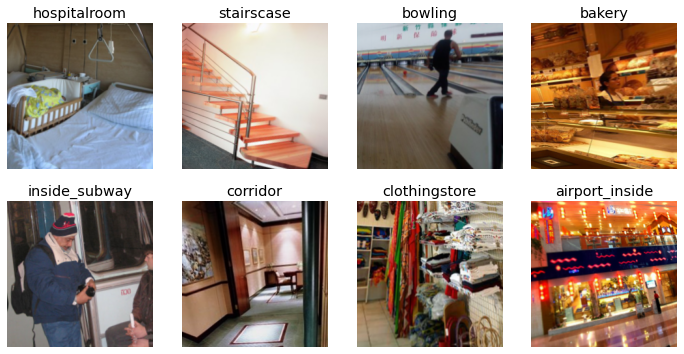

In [305]:
dls.train.show_batch(max_n=8, nrows=2)

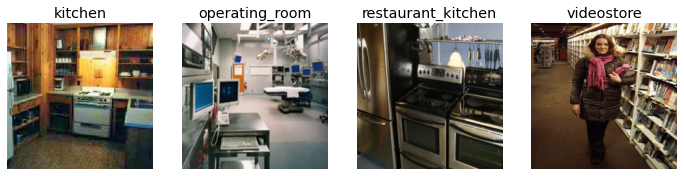

In [304]:
dls.valid.show_batch(max_n=4, nrows=1)

#### Option 2 | DataBlock

- DataBlock: https://docs.fast.ai/tutorial.datablock.html
- Data Augmentation: https://docs.fast.ai/vision.augment.html

The way we usually build the data block in one go is by answering a list of questions:

- what is the types of your inputs/targets? Here images and categories
- where is your data? Here in filenames in subfolders
- does something need to be applied to inputs? Here no
- does something need to be applied to the target? Here the label_func function
- how to split the data? Here randomly
- do we need to apply something on formed items? Here a resize
- do we need to apply something on formed batches? Here no

In [95]:
# doc(DataBlock)

In [181]:
# source: https://docs.fast.ai/data.transforms.html#FileSplitter
def FileSplitter2(fname):
    "Split `items` by providing file `fname` (contains names of valid items separated by newline)."
    valid = Path(fname).read_text().split('\n')
    valid = [Path.cwd()/'clean/MyImages/Images'/x for x in valid]
    def _func(x): return x in valid
    def _inner(o): return FuncSplitter(_func)(o)
    return _inner

def is_category(x): return x.parent.name

In [306]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    
#     get_items=get_image_files,
    get_items=get_urls_from_file,
    
#     splitter=RandomSplitter(valid_pct=0.2, seed=42),
    splitter=FileSplitter2(valid_file),
    
    get_y=is_category,
    item_tfms=Resize(224))

dls = dblock.dataloaders(source=path_imgs.parent/'urls_subsets', path=path_outputs)

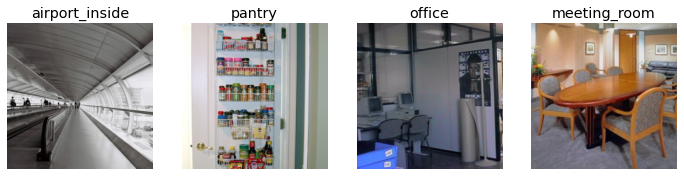

In [307]:
dls.train.show_batch(max_n=4, nrows=1)

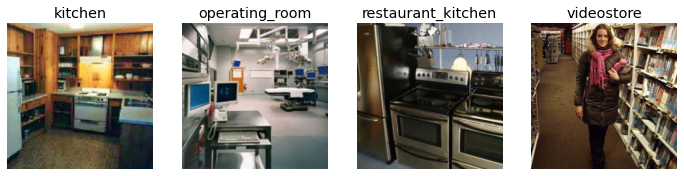

In [308]:
dls.valid.show_batch(max_n=4, nrows=1)

##### item_tfms=Resize(224)

https://docs.fast.ai/vision.augment.html#Resize

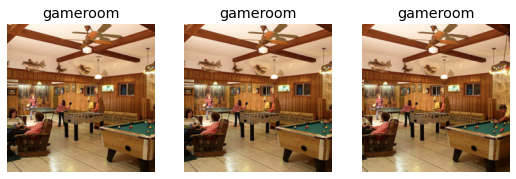

In [309]:
dls.train.show_batch(max_n=3, nrows=1, unique=True)

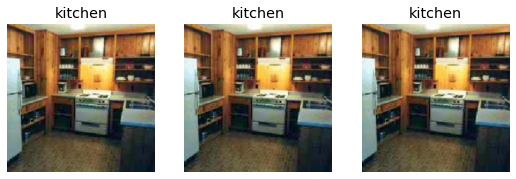

In [192]:
dls.valid.show_batch(max_n=3, nrows=1, unique=True)

##### item_tfms=Resize(128, ResizeMethod.Squish)

https://docs.fast.ai/vision.augment.html#Resize

In [195]:
dls = dblock.new(item_tfms=Resize(224, ResizeMethod.Squish))
dls = dblock.dataloaders(source=path_imgs.parent/'urls_subsets', path=path_outputs)

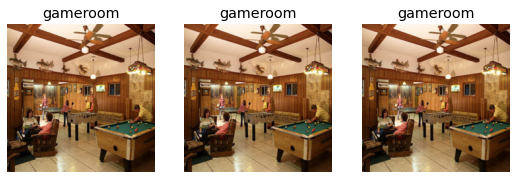

In [196]:
dls.train.show_batch(max_n=3, nrows=1, unique=True)

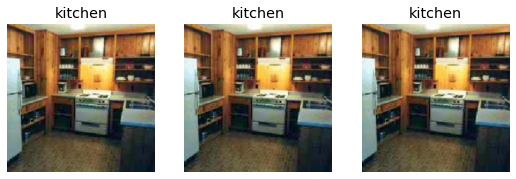

In [197]:
dls.valid.show_batch(max_n=3, nrows=1, unique=True)

##### item_tfms=Resize(224, ResizeMethod.Pad, pad_mode="zeros")

https://docs.fast.ai/vision.augment.html#Resize

In [198]:
dls = dblock.new(item_tfms=Resize(224, ResizeMethod.Pad, pad_mode="zeros"))
dls = dblock.dataloaders(source=path_imgs.parent/'urls_subsets', path=path_outputs)

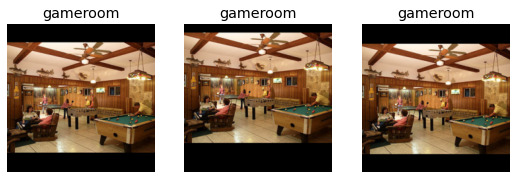

In [201]:
dls.train.show_batch(max_n=3, nrows=1, unique=True)

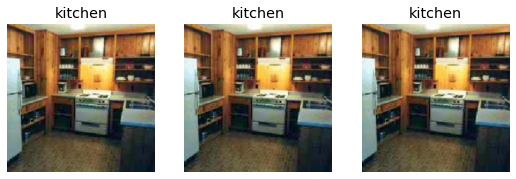

In [202]:
dls.valid.show_batch(max_n=3, nrows=1, unique=True)

##### item_tfms=Resize(224, ResizeMethod.Pad, pad_mode="reflection")

https://docs.fast.ai/vision.augment.html#Resize

In [203]:
dls = dblock.new(item_tfms=Resize(224, ResizeMethod.Pad, pad_mode="reflection"))
dls = dblock.dataloaders(source=path_imgs.parent/'urls_subsets', path=path_outputs)

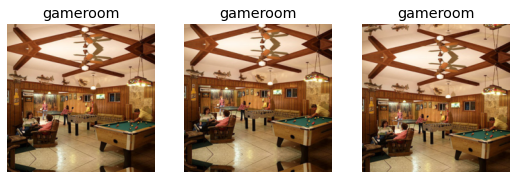

In [204]:
dls.train.show_batch(max_n=3, nrows=1, unique=True)

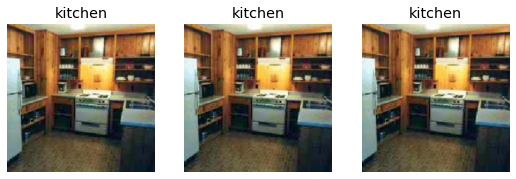

In [205]:
dls.valid.show_batch(max_n=3, nrows=1, unique=True)

##### item_tfms=RandomResizedCrop(224, min_scale=0.3)

https://docs.fast.ai/vision.augment.html#RandomResizedCrop

In [310]:
dls = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.3))
dls = dblock.dataloaders(source=path_imgs.parent/'urls_subsets', path=path_outputs)

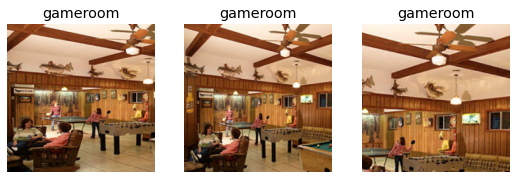

In [311]:
dls.train.show_batch(max_n=3, nrows=1, unique=True)

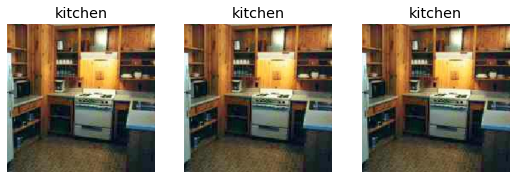

In [208]:
dls.valid.show_batch(max_n=3, nrows=1, unique=True)

### 6. Data Augmentation

In [312]:
dblock = dblock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dblock.dataloaders(source=path_imgs.parent/'urls_subsets', path=path_outputs)

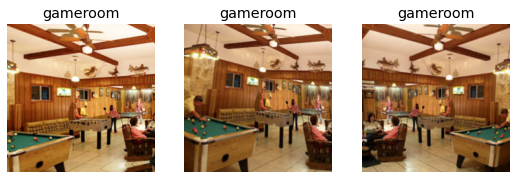

In [313]:
dls.train.show_batch(max_n=3, nrows=1, unique=True)

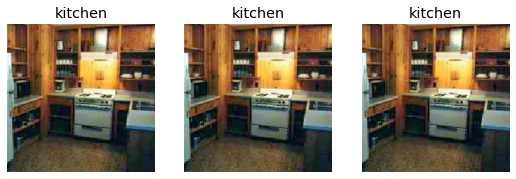

In [264]:
dls.valid.show_batch(max_n=3, nrows=1, unique=True)

### 7. Define learner

In [265]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [315]:
learn.lr = 1e-2
learn.lr

0.01

In [266]:
learn.path

Path('/mnt/home/pierre/fastbook/clean/outputs')

### 8. Training

In [267]:
learn.fine_tune(5)

In [281]:
interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

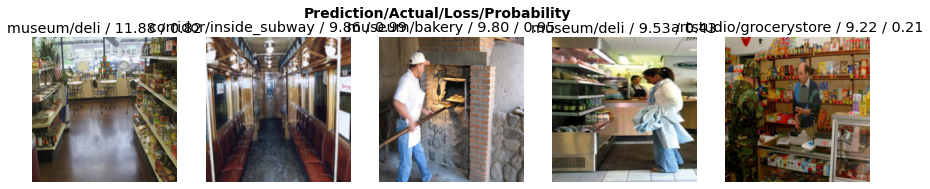

In [269]:
interp.plot_top_losses(5, nrows=1)

In [270]:
learn.save("learner1")

Path('/mnt/home/pierre/fastbook/clean/outputs/models/learner1.pth')

### 9. Dataset clean

In [272]:
from fastai.vision.widgets import *

In [273]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### 10. Export your learner

In [274]:
learn.export()

In [276]:
learn_inf = load_learner(path_outputs/'export.pkl')

## Prediction

In [14]:
# Option 1
# Get any image from yoru computer

In [220]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

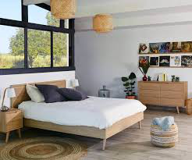

In [278]:
# Option 2
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/room.jpeg'])
img = PILImage.create('images/room.jpeg')
img.to_thumb(192)

In [279]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn_inf.predict(img)
print(f"Categogy: {is_cat}.")
print(f"Probability: {probs[torch.argmax(probs).item()]:.6f}")

Categogy: bedroom.
Probability: 0.379274


In [280]:
learn_inf.predict(img)

('bedroom',
 tensor(6),
 tensor([3.2561e-05, 9.3784e-05, 1.5321e-05, 7.5187e-05, 8.1165e-06, 5.1380e-03, 3.7927e-01, 1.7322e-05, 8.7781e-06, 1.9687e-05, 1.0043e-04, 8.3054e-02, 1.2383e-04, 6.1460e-05, 3.5907e-04, 4.9603e-05,
         8.5548e-05, 8.0088e-05, 8.9343e-05, 2.3334e-04, 2.6733e-06, 1.7575e-03, 9.5745e-04, 1.7625e-05, 8.9453e-06, 2.3344e-05, 4.2526e-04, 1.7754e-04, 1.3552e-03, 1.4425e-05, 1.7506e-05, 4.2871e-05,
         3.4395e-01, 3.2578e-05, 2.6264e-05, 3.3028e-05, 8.5145e-04, 1.2103e-05, 1.0050e-04, 1.3583e-04, 9.7235e-05, 1.5741e-01, 1.8140e-04, 2.9607e-05, 2.4724e-06, 3.8548e-04, 1.7999e-04, 1.3234e-04,
         7.1048e-03, 3.1550e-04, 3.0207e-03, 9.6674e-04, 4.3704e-04, 3.0745e-03, 1.7095e-04, 1.0678e-05, 6.3276e-05, 1.2413e-03, 1.8549e-06, 2.6190e-06, 5.3203e-06, 7.4240e-06, 1.5082e-06, 5.0493e-05,
         5.4577e-03, 4.1049e-04, 3.6821e-04]))

## Annex 1 | Learning Rate

- LR Finder: https://docs.fast.ai/callback.schedule.html#LRFinder
- https://stackoverflow.com/questions/61172627/choosing-the-learning-rate-using-fastais-learn-lr-find

In [224]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [225]:
learn.lr

0.001

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0063095735386013985)

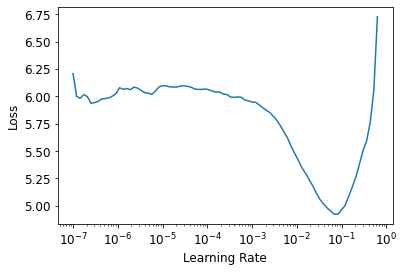

In [226]:
learn.lr_find()

In [227]:
learn.lr = 1e-2
learn.lr

0.01

In [228]:
learn.fine_tune(1)

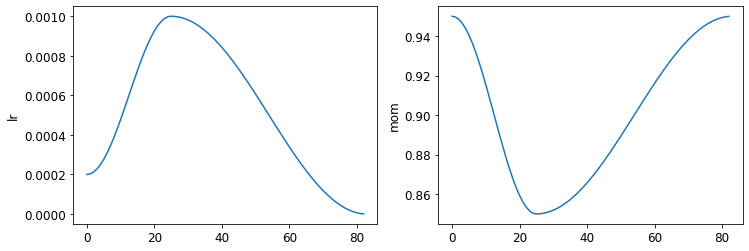

In [229]:
learn.recorder.plot_sched()

## Annex 2 | Number of training/validation steps

In [230]:
# training
int(len(learn.dls.train_ds) / learn.dls.train.bs) + 1

84

In [231]:
# validation
int(len(learn.dls.valid_ds) / learn.dls.valid.bs) + 1

21

## Annex 3 | Overfitting

In [256]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate,accuracy])

In [257]:
learn.lr = 5e-1

In [258]:
results = learn.fine_tune(10)

In [259]:
# source: https://forums.fast.ai/t/plotting-metrics-after-learning/69937/3
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
    
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

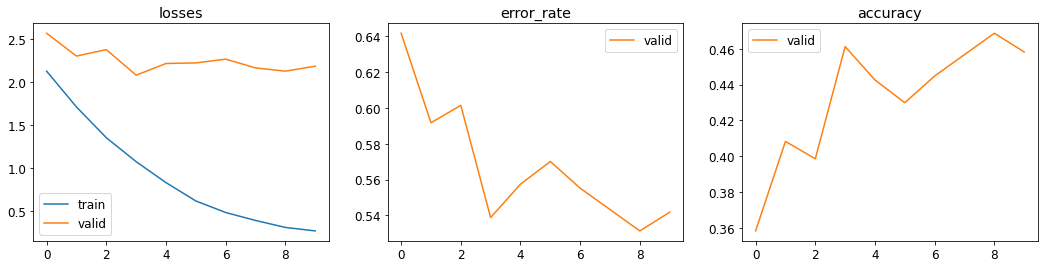

In [260]:
learn.recorder.plot_metrics()

## Annex 4 | Resize()

https://docs.fast.ai/vision.augment.html#Resize-with-crop,-pad-or-squish

In [237]:
path_imgs.ls()

(#67) [Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/museum'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/mall'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/hospitalroom'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/greenhouse'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/bathroom'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/church_inside'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/kitchen'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/winecellar'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/videostore'),Path('/mnt/home/pierre/fastbook/clean/MyImages/Images/corridor')...]

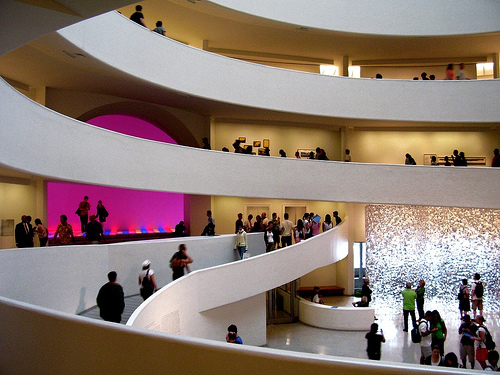

In [239]:
img = PILImage.create(path_imgs.ls()[0].ls()[0])
# img.to_thumb(192)
img

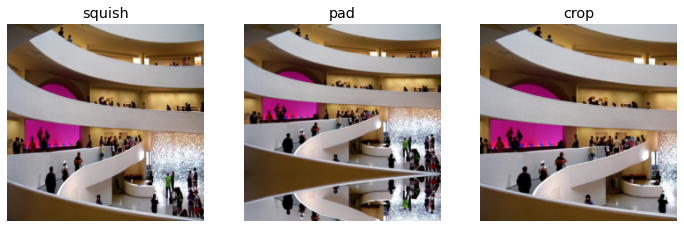

In [240]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,method in zip(axs.flatten(), [ResizeMethod.Squish, ResizeMethod.Pad, ResizeMethod.Crop]):
    rsz = Resize(224, method=method, pad_mode="reflection")
    show_image(rsz(img, split_idx=0), ctx=ax, title=method);

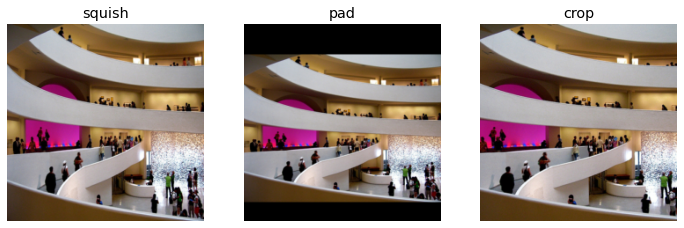

In [241]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,method in zip(axs.flatten(), [ResizeMethod.Squish, ResizeMethod.Pad, ResizeMethod.Crop]):
    rsz = Resize(224, method=method, pad_mode="zeros")
    show_image(rsz(img, split_idx=0), ctx=ax, title=method);

## Annex 5 | Data Augmentation

In [319]:
# doc(aug_transforms)

source: https://docs.fast.ai/vision.augment#aug_transforms